Jupyter notebook attached to quickly visualise code results

In [9]:
#first run these dependencies to allow cells below to run
import numpy as np
from matplotlib import pyplot as plt
import resource.pulseshape as pulse
import resource.operators as op
import resource.ramanfunction as rf 
from copy import deepcopy

In [46]:
#define numerical parameters
b2 = 0.001e6 #in fs^2m^-1
stepsize = 0.05 #in meters
gamma = 1.6
steps = 300 #z steps - s.t. total length = steps * stepsize in meters
timeNum = 1000 #number of time samples
t1 = -500 #start time in fs
t2 = 500 #end time in fs
samplingRate = timeNum/(t2-t1) #samples per femtosecond
t = np.linspace(t1,t2,timeNum)
gaussPulseInitial = pulse.GaussianPulse(t,50) #50fs pulse

Test output for RK method below

Text(0.5, 0, '$\\nu - \\nu_0$')

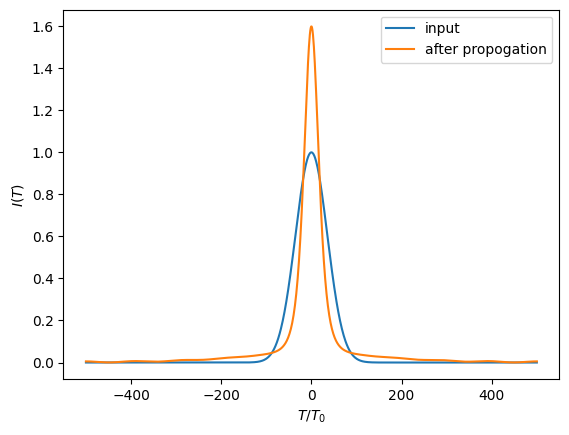

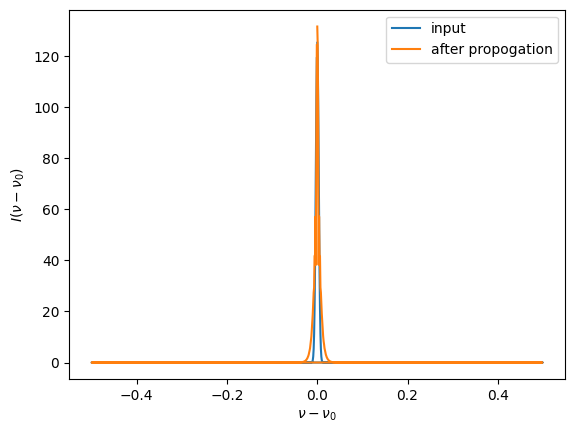

In [47]:
#testing generalised GVD version of RK4IP
attenuation = 0
dispersionList = [-b2,0] # should give the same result as above when we only consider beta_2

#to visualize in 2d, save pulse at each z
gaussPulse = op.GeneralGVDRK4IP(dispersionList,attenuation,gamma,stepsize,samplingRate,gaussPulseInitial)
for i in range(steps-1):
    gaussPulse = op.GeneralGVDRK4IP(dispersionList,attenuation,gamma,stepsize,samplingRate,gaussPulse)

initialFT = np.fft.fft(gaussPulseInitial)
propFT = np.fft.fft(gaussPulse)
freqs = np.fft.fftfreq(timeNum,1/samplingRate)
#plot results
plt.plot(t,np.square(gaussPulseInitial),label = "input")
plt.plot(t,np.square(np.abs(gaussPulse)),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(T)$")
plt.xlabel(r"$T/T_0$")
plt.figure()
plt.plot(freqs,np.abs(initialFT),label = "input")
plt.plot(freqs,np.abs(propFT),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(\nu - \nu_0)$")
plt.xlabel(r"$\nu - \nu_0$")



(-0.05, 0.05)

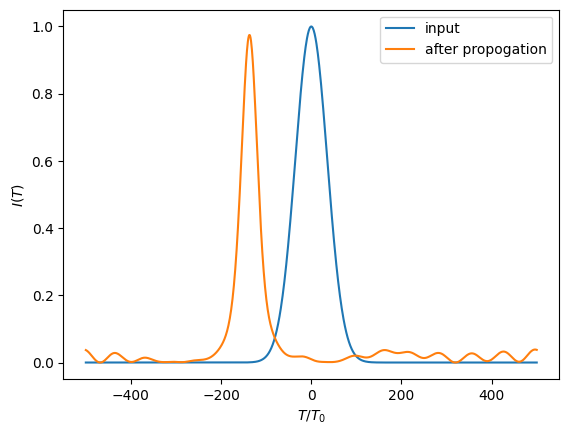

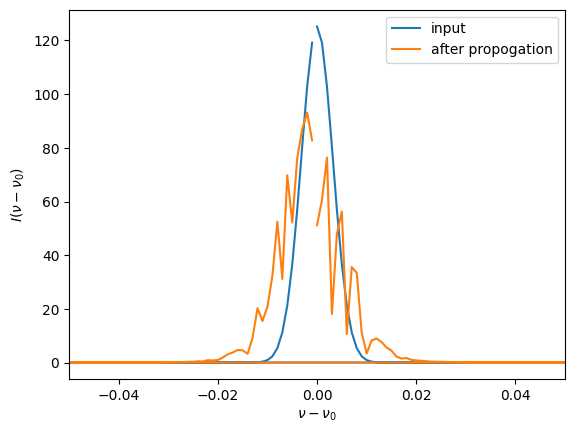

In [49]:
#testing generalised Full GNLSE version of RK4IP
attenuation = 0
dispersionList = [-b2,0] # should give the same result as above when we only consider beta_2
ramanFraction = 0.18
centFrequency = 100 #pulse is normalised so instead define centFrequency as central angular frequency multiplied by duration of pulse - if pulse is NOT normalised use the real angular frequency
ramanCurve = rf.BlowWoodResponse(1000,1000,12.2,32)[1]
#to visualize in 2d, save pulse at each z
gaussPulse = op.GNLSERK4IP(dispersionList,attenuation,gamma,ramanCurve,ramanFraction,centFrequency,stepsize,samplingRate,gaussPulseInitial)
for i in range(steps-1):
    gaussPulse = op.GNLSERK4IP(dispersionList,attenuation,gamma,ramanCurve,ramanFraction,centFrequency,stepsize,samplingRate,gaussPulse)

initialFT = np.fft.fft(gaussPulseInitial)
propFT = np.fft.fft(gaussPulse)
freqs = np.fft.fftfreq(timeNum,1/samplingRate)
#plot results
plt.plot(t,np.square(gaussPulseInitial),label = "input")
plt.plot(t,np.square(np.abs(gaussPulse)),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(T)$")
plt.xlabel(r"$T/T_0$")
plt.figure()
plt.plot(freqs,np.abs(initialFT),label = "input")
plt.plot(freqs,np.abs(propFT),label = "after propogation")
plt.legend(loc="best")
plt.ylabel(r"$I(\nu - \nu_0)$")
plt.xlabel(r"$\nu - \nu_0$")
plt.xlim(-0.05,0.05)